<a href="https://colab.research.google.com/github/janorena/analitica-de-datos/blob/master/base_de_datos_ataque_cardiaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-14 22:55:51--  https://docs.google.com/uc?export=download&confirm=&id=1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9
Resolving docs.google.com (docs.google.com)... 74.125.23.139, 74.125.23.138, 74.125.23.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-5k-docs.googleusercontent.com/docs/securesc/ihfop3hgbu32imipih7co323shc7v3v1/nsgckujhpcrd3hulbl69i5l4p0t4d95k/1602716100000/12793268178827524168/06543784593310215734Z/1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9?e=download [following]
--2020-10-14 22:55:52--  https://doc-08-5k-docs.googleusercontent.com/docs/securesc/ihfop3hgbu32imipih7co323shc7v3v1/nsgckujhpcrd3hulbl69i5l4p0t4d95k/1602716100000/12793268178827524168/06543784593310215734Z/1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9?e=download
Resolving doc-08-5k-docs.googleusercontent.com (doc-08-5k-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-

In [ ]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline


#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")



import pandas as pd
%matplotlib inline
csv_path = 'heart_failure_clinical_records_dataset.csv'

Xdata = pd.read_csv(csv_path)

col_drop = ['time' ]
Xdata.drop(columns = col_drop, inplace = True)
Xdata.head(15)

Carpeta results ya existe


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


###Sex - Male = 1, Female =0
###Age - Age of patient
###Diabetes - 0 = No, 1 = Yes
###Anaemia - 0 = No, 1 = Yes
###High blood pressure - 0 = No, 1 = Yes
###Smoking - 0 = No, 1 = Yes
###DEATH EVENT - 0 = No, 1 = Yes

In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB




*   Dado que el tipo de dato no es categorico no es necesario decodificar el tipo de variable.
* Es necesario hacer el entrenamiento y la validacion.



**Preproceso variable median_income -> continua a categórica**

# Datos del evento de interes

In [ ]:
Xdata["DEATH_EVENT"].describe() # estadística básica de las variable de interés

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

# Paso 2: Particion entrenamiento y validacion


In [ ]:
# Tamaño Xtrain 70%, Tamaño Xtest 30%
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_DEATH = "DEATH_EVENT"
ytrain = Xtrain[col_DEATH]
ytest = Xtest[col_DEATH]
Xtrain.drop(columns=col_DEATH,inplace=True)
Xtest.drop(columns=col_DEATH,inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(209,) (90,)


# Preparar datos (validación y análisis exploratorio por visualización)

In [ ]:
# Entrenamiento
# DEATH EVENT -> 0 = No, 1 = Yes
ytrain[:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

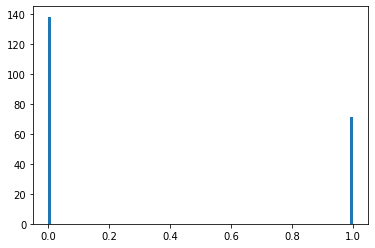

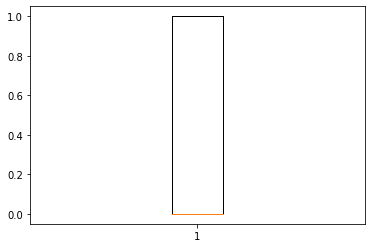

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.show()

* Se definirian las columnas para decodificar. Dado que en la base de datos no es necesario decodificar los datos, se deja como esta.
* E esta base de datos ya sta pre procesada por ende, no se crea la clase para la misma ya que seria redundante hacerle esto a la base de datos.

# (probabilidad descriptiva grafica)

## ¿Es la edad y el tabaco un indicador del evento de muerte?

## Analisis de supervivencia segun el genero



In [ ]:
male = Xdata[Xdata["sex"]==1]
female = Xdata[Xdata["sex"]==0]

male_survi = male[Xdata["DEATH_EVENT"]==0]
male_not = male[Xdata["DEATH_EVENT"]==1]
female_survi = female[Xdata["DEATH_EVENT"]==0]
female_not = female[Xdata["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[Xdata["DEATH_EVENT"]==0]),len(male[Xdata["DEATH_EVENT"]==1]),
         len(female[Xdata["DEATH_EVENT"]==0]),len(female[Xdata["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
plt.savefig('results/Analysis_on_Survival.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

* segun los resultados del analisis anterior, se puede notar la relacion con respecto a los hombres y mujeres que mueren o sobreviven. 

## Análisis factorial de género segun su mortandad

In [ ]:
surv = Xdata[Xdata["DEATH_EVENT"]==0]["age"]
not_surv = Xdata[Xdata["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.9)
fig.update_layout(
    title_text="Análisis en edad sobre estado de supervivencia")
plt.savefig('results/Analysis_on_Survival.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

* La supervivencia es alta de 45 a 75
* La propagación de la no supervivencia está pasando por todas las edades.

#### Edad vs mortandad

In [ ]:
fig = px.violin(Xdata, y="age", x="DEATH_EVENT", color="DEATH_EVENT", box=True, points="all", hover_data=Xdata.columns)
fig.update_layout(title_text="Análisis en edad y género sobre el estado de supervivencia")
plt.savefig('results/Analysis_of_sex_and_DEATH_EVENT.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

Informe de edad
* La propagación de la supervivencia es alta en edades de 40 a 70
* La supervivencia es alta tanto para hombres de 50 a 60 años como para mujeres de 60 a 70 años respectivamente.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

# PREDICCION DE VARIABLES DE INTERES

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 122 to 12
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   anaemia                   209 non-null    int64  
 2   creatinine_phosphokinase  209 non-null    int64  
 3   diabetes                  209 non-null    int64  
 4   ejection_fraction         209 non-null    int64  
 5   high_blood_pressure       209 non-null    int64  
 6   platelets                 209 non-null    float64
 7   serum_creatinine          209 non-null    float64
 8   serum_sodium              209 non-null    int64  
 9   sex                       209 non-null    int64  
 10  smoking                   209 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 19.6 KB


In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
Xtrain_pre_z = sca.fit_transform(Xtrain)

In [ ]:
Xtrain_pre_z.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
Xtrain.var(axis=0)

age                         1.431764e+02
anaemia                     2.433290e-01
creatinine_phosphokinase    9.521129e+05
diabetes                    2.470096e-01
ejection_fraction           1.407284e+02
high_blood_pressure         2.269047e-01
platelets                   5.996337e+09
serum_creatinine            1.045800e+00
serum_sodium                2.192602e+01
sex                         2.298031e-01
smoking                     2.096522e-01
dtype: float64

In [ ]:
red = PCA()
zz = red.fit_transform(Xtrain_pre_z)

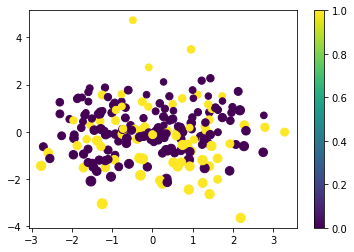

In [ ]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['age']/(Xtrain['age'].max()))
plt.colorbar()
plt.savefig('results/Xtrain.pdf', format='pdf', dpi=300)
plt.show()

* 

In [ ]:
# proceso con test
Xtest['age']

135    75.0
152    50.0
212    78.0
109    45.0
40     70.0
       ... 
252    50.0
180    40.0
223    47.0
105    72.0
44     60.0
Name: age, Length: 90, dtype: float64

In [ ]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 135 to 44
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       90 non-null     float64
 1   anaemia                   90 non-null     int64  
 2   creatinine_phosphokinase  90 non-null     int64  
 3   diabetes                  90 non-null     int64  
 4   ejection_fraction         90 non-null     int64  
 5   high_blood_pressure       90 non-null     int64  
 6   platelets                 90 non-null     float64
 7   serum_creatinine          90 non-null     float64
 8   serum_sodium              90 non-null     int64  
 9   sex                       90 non-null     int64  
 10  smoking                   90 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 8.4 KB


In [ ]:
zztest = red.transform(sca.transform(Xtest)) # una sola linea

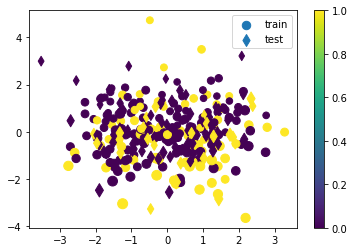

In [ ]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['age']/(Xtrain['age'].max()),label='train')
plt.colorbar()
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest['age']/Xtest['age'].max(),marker='d',label='test')
plt.legend()
plt.savefig('results/Xtest.pdf', format='pdf', dpi=300)
plt.show()

# definir modelos de predicción